In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle as pk
import joblib as jb
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("insurance.xlsx")


In [3]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
 df.isnull()

,age,gender,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Measures of Central Tendency

In [8]:
df.bmi.mean()

30.66339686098655

In [10]:
df.bmi.median()

30.4

In [11]:
df.region.mode()

0    southeast
Name: region, dtype: object

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
import seaborn as sb

<Axes: ylabel='Count'>

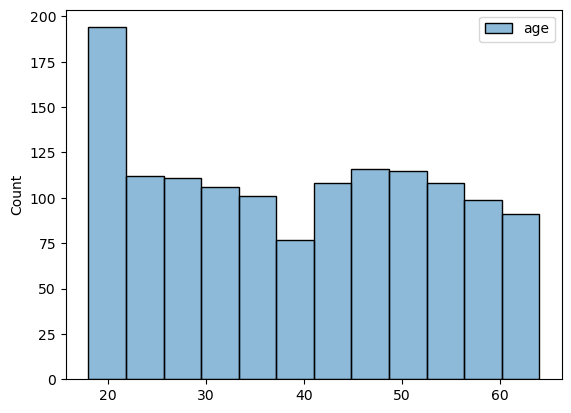

In [14]:
sb.histplot(df[["age"]])

<Axes: ylabel='Count'>

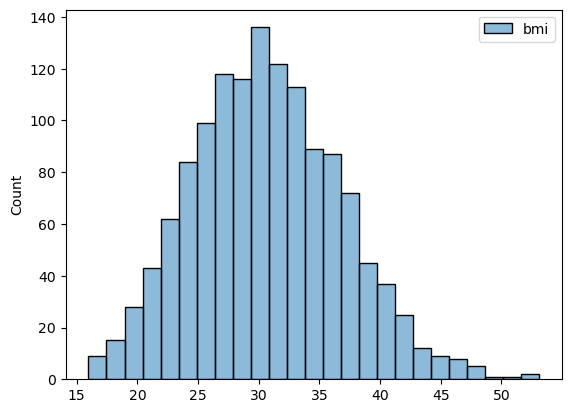

In [15]:
sb.histplot(df[["bmi"]])

<Axes: ylabel='Count'>

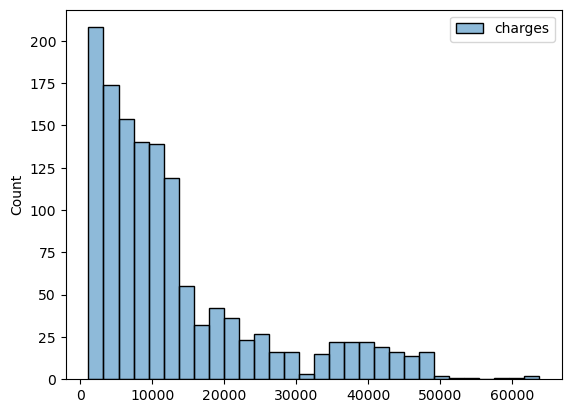

In [16]:
sb.histplot(df[["charges"]])

# Heatmap

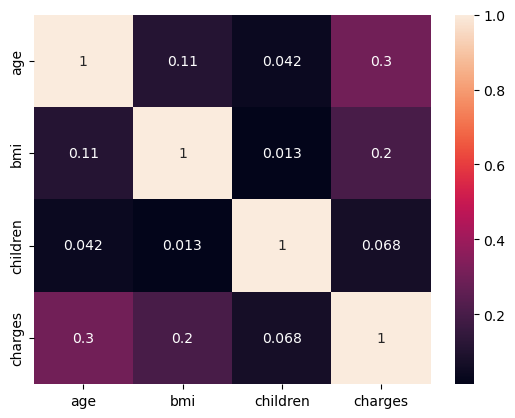

In [17]:
sb.heatmap(df.corr(),annot=True)
plt.savefig("heatmap.png")

# Handle NAN value (NAN==NULL)


In [18]:
# if there was any null value in any coloumn it will replace by mean value
#Mean_columnName = df.columnName.mean()
#df.columnName = df.columnName.fillna(Mean_columnName)

In [19]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()
df6 = df.copy()
df7 = df.copy()
df8 = df.copy()
df9 = df.copy()
df10 = df.copy()
df11 = df.copy()
df12 = df.copy()

# Without Encoding


In [20]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [22]:
df.region = df.region.replace(['southwest', 'southeast', 'northwest', 'northeast'], [1,2,3,4])
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,1,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,3,21984.47061
4,32,male,28.880,0,no,3,3866.85520


In [23]:
df.gender.unique()


array(['female', 'male'], dtype=object)

In [24]:
df.gender = df.gender.replace(['female','male'],[2,3])

In [25]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [26]:
df.smoker = df.smoker.replace(['yes','no'],[1,0])

In [27]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,1,16884.92400
1,18,3,33.770,1,0,2,1725.55230
2,28,3,33.000,3,0,2,4449.46200
3,33,3,22.705,0,0,3,21984.47061
4,32,3,28.880,0,0,3,3866.85520


# Label Encoding


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # creat object
df1.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
df1.gender = le.fit_transform(df1['gender'])
df1.smoker = le.fit_transform(df1['smoker'])
df1.region = le.fit_transform(df1['region'])

In [32]:
df1.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Using Loop

In [33]:
df2.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [34]:
for col in df2.columns:
    if df2[col].dtype == np.number:
        continue
    else:
        df2[col] = le.fit_transform(df2[col])

In [35]:
df2.head()

,age,gender,bmi,children,smoker,region,charges
0,1,0,27.900,0,1,3,16884.92400
1,0,1,33.770,1,0,2,1725.55230
2,10,1,33.000,3,0,2,4449.46200
3,15,1,22.705,0,0,1,21984.47061
4,14,1,28.880,0,0,1,3866.85520


# Another way

In [39]:
from pandas.core.dtypes.common import is_numeric_dtype

In [37]:
for i in df3.columns:
    if is_numeric_dtype(df3[i]):
        continue
    else:
        df3[i] = le.fit_transform(df3[i])

In [38]:
df3.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# One Hot Encoding


In [41]:
df4.head()


,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
df4_cat = df4.select_dtypes(np.object_)
df4_num = df4.select_dtypes(np.number)

In [43]:
df4_cat.head()

,gender,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [44]:
df4_num.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [46]:
dummy = pd.get_dummies(df4_cat,columns=['gender','smoker','region'])
dummy.head()


,gender_female,gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


In [47]:
df4.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
df4.drop(['gender','smoker','region'],axis=1,inplace=True)

In [49]:
df4.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


# Dummy variable Trap

In [50]:
dummy.head()

,gender_female,gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


In [51]:
dummy = pd.get_dummies(df4_cat,columns=['gender','smoker','region'], drop_first=1)

In [52]:
dummy = dummy.astype(int)
dummy.head()

,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [53]:
df5 =pd.concat([df4_num,dummy],axis=1)

In [54]:
df5.head()

,age,bmi,children,charges,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


# One hot encoding using Loop

In [55]:
df6.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
cols = ['gender','smoker','region']
for i in cols:
    dummies = pd.get_dummies(df6[i],drop_first=1).astype(int)
    df6 = pd.concat([df6, dummies], axis=1)
    df6.drop([i], axis=1, inplace=True)
df6.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


# Ordinal Encoding

In [57]:
df7.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [58]:
from sklearn.preprocessing import OrdinalEncoder
od = OrdinalEncoder()

In [59]:
df7['gender'] = od.fit_transform(df7[['gender']])
df7['smoker'] = od.fit_transform(df7[['smoker']])
df7['region'] = od.fit_transform(df7[['region']])

In [60]:
df7.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


# Ordinal Encoder Using Loop

In [61]:
df8.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [63]:
for i in df8.columns:
    if is_numeric_dtype(df8[i]):
        continue
    else:
        df8[i] = od.fit_transform(df8[[i]])
df8.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
